In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 



In [2]:
from google.colab import files 
file1 = files.upload()

Saving sivb_2020.csv to sivb_2020.csv


In [3]:
df = pd.read_csv('sivb_2020.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,252.649994,254.270004,249.669998,254.270004,254.270004,261800
1,2020-01-03,247.960007,251.119995,246.800003,250.330002,250.330002,476500
2,2020-01-06,246.839996,249.800003,245.059998,249.240005,249.240005,490800
3,2020-01-07,248.660004,251.119995,247.580002,250.399994,250.399994,506500
4,2020-01-08,249.820007,254.119995,249.130005,252.779999,252.779999,502000
...,...,...,...,...,...,...,...
119,2020-06-23,224.380005,224.759995,220.039993,220.470001,220.470001,304600
120,2020-06-24,217.919998,217.919998,207.539993,207.979996,207.979996,343100
121,2020-06-25,205.199997,215.479996,204.800003,215.000000,215.000000,231500
122,2020-06-26,211.050003,211.330002,203.570007,203.860001,203.860001,517900


In [4]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-01-02,2020-01-02,252.649994,254.270004,249.669998,254.270004,254.270004,261800
2020-01-03,2020-01-03,247.960007,251.119995,246.800003,250.330002,250.330002,476500
2020-01-06,2020-01-06,246.839996,249.800003,245.059998,249.240005,249.240005,490800
2020-01-07,2020-01-07,248.660004,251.119995,247.580002,250.399994,250.399994,506500
2020-01-08,2020-01-08,249.820007,254.119995,249.130005,252.779999,252.779999,502000
...,...,...,...,...,...,...,...
2020-06-23,2020-06-23,224.380005,224.759995,220.039993,220.470001,220.470001,304600
2020-06-24,2020-06-24,217.919998,217.919998,207.539993,207.979996,207.979996,343100
2020-06-25,2020-06-25,205.199997,215.479996,204.800003,215.000000,215.000000,231500
2020-06-26,2020-06-26,211.050003,211.330002,203.570007,203.860001,203.860001,517900


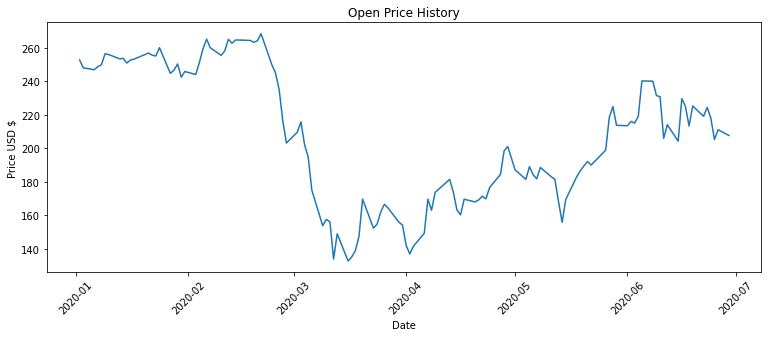

In [5]:
plt.figure(figsize = (12.8, 4.6))
plt.plot(df['Open'], label = 'Open')
plt.xticks(rotation = 45)
plt.title('Open Price History')
plt.xlabel('Date')
plt.ylabel('Price USD $')
plt.show()

In [6]:
shortEMA = df.Open.ewm(span = 12, adjust = False).mean()
longEMA = df.Open.ewm(span = 26, adjust = False).mean()
macd = shortEMA - longEMA
signal_line = macd.ewm(span=9, adjust=False).mean()

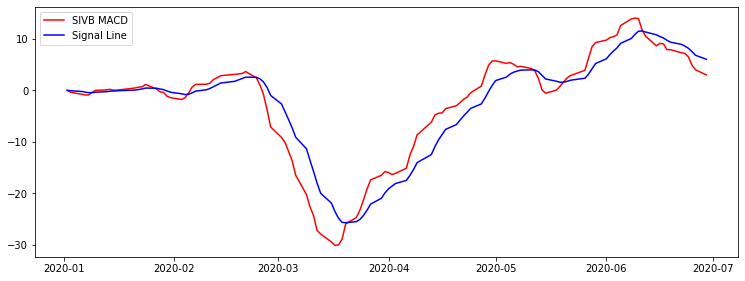

In [8]:
plt.figure(figsize = (12.6, 4.6))
plt.plot(df.index, macd, label = 'SIVB MACD', color = 'red')
plt.plot(df.index, signal_line, label = 'Signal Line', color = 'blue')
plt.legend(loc='upper left')
plt.show()

In [9]:
df['macd'] = macd
df['Signal Line'] = signal_line
df

,Date,Open,High,Low,Close,Adj Close,Volume,macd,Signal Line
2020-01-02,2020-01-02,252.649994,254.270004,249.669998,254.270004,254.270004,261800,0.000000,0.000000
2020-01-03,2020-01-03,247.960007,251.119995,246.800003,250.330002,250.330002,476500,-0.374130,-0.074826
2020-01-06,2020-01-06,246.839996,249.800003,245.059998,249.240005,249.240005,490800,-0.752334,-0.210328
2020-01-07,2020-01-07,248.660004,251.119995,247.580002,250.399994,250.399994,506500,-0.894888,-0.347240
2020-01-08,2020-01-08,249.820007,254.119995,249.130005,252.779999,252.779999,502000,-0.903842,-0.458560
...,...,...,...,...,...,...,...,...,...
2020-06-23,2020-06-23,224.380005,224.759995,220.039993,220.470001,220.470001,304600,7.182197,8.593386
2020-06-24,2020-06-24,217.919998,217.919998,207.539993,207.979996,207.979996,343100,6.490604,8.172830
2020-06-25,2020-06-25,205.199997,215.479996,204.800003,215.000000,215.000000,231500,4.860090,7.510282
2020-06-26,2020-06-26,211.050003,211.330002,203.570007,203.860001,203.860001,517900,3.993903,6.807006


In [10]:
def buy_sell(signal_line):
  buy = []
  sell = []
  flag = -1
  for i in range(0, len(signal_line)):
   
    if signal_line['macd'][i] > signal_line['Signal Line'][i]:
      sell.append(np.nan)
      if flag != 1:
        buy.append(signal_line['Open'][i])
        flag = 1
      else:
        buy.append(np.nan)
    elif signal_line['macd'][i] < signal_line['Signal Line'][i]:
      buy.append(np.nan)
      if flag != 0:
        sell.append(signal_line['Open'][i])
        flag = 0
      else:
        sell.append(np.nan)
    else:
      buy.append(np.nan)
      sell.append(np.nan)
  return (buy,sell)

In [11]:
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,macd,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2020-01-02,2020-01-02,252.649994,254.270004,249.669998,254.270004,254.270004,261800,0.000000,0.000000,NaN,NaN
2020-01-03,2020-01-03,247.960007,251.119995,246.800003,250.330002,250.330002,476500,-0.374130,-0.074826,NaN,247.960007
2020-01-06,2020-01-06,246.839996,249.800003,245.059998,249.240005,249.240005,490800,-0.752334,-0.210328,NaN,NaN
2020-01-07,2020-01-07,248.660004,251.119995,247.580002,250.399994,250.399994,506500,-0.894888,-0.347240,NaN,NaN
2020-01-08,2020-01-08,249.820007,254.119995,249.130005,252.779999,252.779999,502000,-0.903842,-0.458560,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-23,2020-06-23,224.380005,224.759995,220.039993,220.470001,220.470001,304600,7.182197,8.593386,NaN,NaN
2020-06-24,2020-06-24,217.919998,217.919998,207.539993,207.979996,207.979996,343100,6.490604,8.172830,NaN,NaN
2020-06-25,2020-06-25,205.199997,215.479996,204.800003,215.000000,215.000000,231500,4.860090,7.510282,NaN,NaN
2020-06-26,2020-06-26,211.050003,211.330002,203.570007,203.860001,203.860001,517900,3.993903,6.807006,NaN,NaN


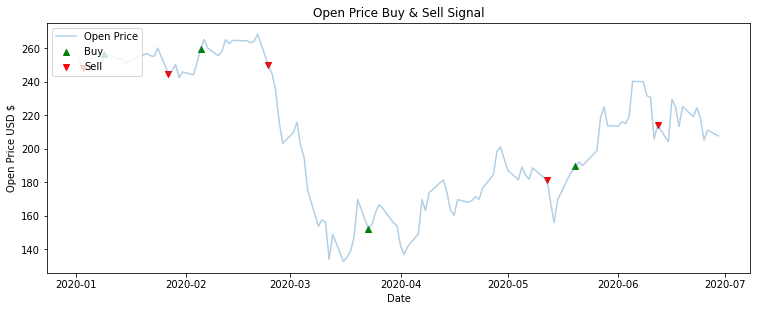

In [13]:
plt.figure(figsize = (12.6, 4.6))
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green', label = 'Buy', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red', label = 'Sell', marker = 'v', alpha = 1)
plt.plot(df['Open'], label = 'Open Price', alpha = 0.35)
plt.title('Open Price Buy & Sell Signal')
plt.xlabel('Date')
plt.ylabel('Open Price USD $')
plt.legend(loc = 'upper left')
plt.show()